### This Notebook is a sandbox for SCE in a static Causal Hans Setting

#### Imports and Global Configurations

In [1]:
from dotenv import load_dotenv
load_dotenv()

import os
import numpy as np
from IPython.display import Image
from CausalHansSCE import CausalHansDataSCE, CausalHansInterpreterSCE
from SCE.CausalNodeSCE import CausalNodeSCE, nodenamefuncSCE
from Utils.load import load_dataset
from Utils.images import getDynDirImg, getTimeAsString, generateTreeImageSCE

In [2]:
IMG_BASE_PATH = os.path.join("tmp_img", "SCE")
os.makedirs(IMG_BASE_PATH, exist_ok=True)

#### Load Data and Prepare Data-Object for SCE (Selection Person to look at)

In [3]:
PATH_TO_DATA = os.path.join("tmp_data", "sce_causalhans.pkl")
data = load_dataset(PATH_TO_DATA)
data = np.vstack((data['A'], data['F'], data['H'], data['M'])).T
data = CausalHansDataSCE(data=data)


validIDs = []  
for i in range(len(data.data)):
    try:
        id, patient_name = i, "Klaus"
        data.select_entry(id, patient_name)
        interpreter = CausalHansInterpreterSCE()
        Q_M = interpreter.Q(data, data.n2i["M"])
        validIDs.append(id)
    except Exception as e:
        continue

print("Valid IDs: ", validIDs)
id, patient_name = validIDs[0], "Klaus"
data.select_entry(id, patient_name)

Valid IDs:  [1, 2, 3, 5, 6, 7, 9, 10, 12, 17, 20, 23, 24, 26, 27, 29, 30, 33, 34, 38, 40, 41, 42, 43, 45, 49, 50, 55, 56, 63, 64, 65, 66, 73, 75, 77, 80, 81, 83, 88, 89, 90, 91, 95, 97, 99, 101, 104, 107, 113, 115, 117, 118, 120, 122, 123, 126, 134, 136, 138, 141, 142, 143, 144, 145, 147, 148, 149, 152, 153, 157, 158, 161, 166, 167, 171, 172, 174, 175, 176, 177, 180, 183, 184, 185, 186, 187, 188, 189, 190, 191, 193, 194, 195, 198, 199, 200, 203, 204, 206, 210, 211, 213, 214, 216, 218, 220, 222, 225, 226, 228, 229, 232, 233, 240, 243, 244, 245, 252, 254, 256, 257, 259, 261, 265, 270, 272, 273, 277, 278, 282, 283, 284, 287, 291, 292, 293, 294, 296, 301, 302, 303, 309, 311, 312, 314, 315, 316, 317, 319, 329, 331, 332, 333, 338, 341, 342, 343, 344, 349, 350, 351, 354, 355, 359, 360, 361, 363, 365, 367, 368, 370, 372, 373, 374, 376, 381, 384, 387, 390, 392, 394, 395, 397, 398, 403, 404, 407, 408, 410, 412, 416, 417, 418, 423, 424, 426, 427, 428, 431, 436, 437, 438, 441, 442, 444, 445, 449, 

#### Setting up the interpreter for this Python Notebook

In [4]:
interpreter = CausalHansInterpreterSCE()
Q_M = interpreter.Q(data, data.n2i["M"])
pQ = interpreter.pronounce_Q(data, Q_M)
print("The pronounciation of interest is: ", pQ)

The pronounciation of interest is:  Why is Klaus Mobility below average?


#### Running the SCE Algorithm and pronounce the causal explanation

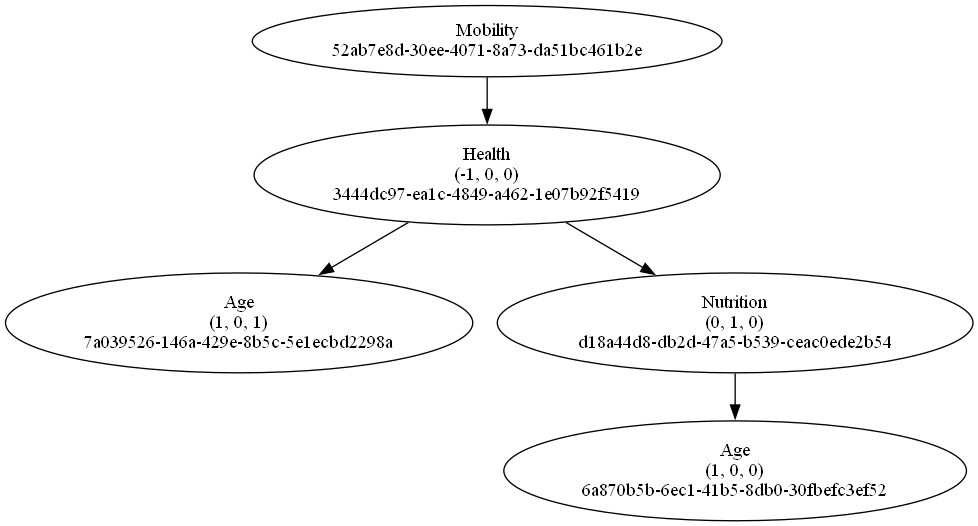

In [5]:
sce_root = CausalNodeSCE("Mobility")
params_SCE = {
    "data": data,
    "Q_C": Q_M,
    "node": sce_root,
}
interpreter.SCE(**params_SCE)

filepath = os.path.join(IMG_BASE_PATH, f"SCE_{getTimeAsString()}.png")
generateTreeImageSCE(sce_root, nodenamefuncSCE ,filepath)
display(Image(filename=filepath))

In [6]:
pJ_noDuplicates = interpreter.pronounce_SCE(pQ, sce_root, removeDuplicates=True)
print(pJ_noDuplicates, "\n")

pJ_withDuplicates = interpreter.pronounce_SCE(pQ, sce_root, removeDuplicates=False)
print(pJ_withDuplicates)

Klaus mobility is below average because of low Health which is mostly because of high Age although the high Nutrition  

Klaus mobility is below average because of low Health which is mostly because of high Age although the high Nutrition which is because of high Age 
